In [1]:
import matplotlib.pyplot as plt
import pycollimator as C
import math
%matplotlib widget

#Set up a connect to the collimator API
token = "507d5f58-59b6-4328-b600-xxx" #copy your token here - I redacted the token for security purposes xDxD
project_uuid = "858d5ed1-16b2-4563-9e5e-8623755fe414" #copy your project uuid here
C.set_auth_token(token, project_uuid)

#View the models within the project file
print(C.list_models())

#load the models
passive = C.load_model('Passive Suspension Control')
active = C.load_model('Active Suspension Control')

#Run the Simulations and shows logs
sim_passive = C.run_simulation(passive)
sim_passive.show_logs()
sim_active = C.run_simulation(active)
sim_active.show_logs()

#Transform the simulation results into a pandas dataframe
data_pas = sim_passive.results.to_pandas()
data_act = sim_active.results.to_pandas()


# plt.figure()
# plt.title("Test")

[<Model name='Passive Suspension Control'>, <Model name='bump_signal'>, <Model name='Active Suspension Control'>, <Model name='Hydraulic Actuator'>, <Model name='test_hydraulic_controller'>]

2023-07-08 18:57:57.225 INF model compiled successfully simulation_uuid=474e1559-18c3-48ea-a44b-d19daf96c038 time=0.3168361186981201
2023-07-08 18:57:57.270 INF starting model binary 🚀
2023-07-08 18:57:57.454 INF simulation completed successfully 🎉 total_time=0.186044 simulation_time=0.026983

2023-07-08 18:58:03.651 INF model compiled successfully simulation_uuid=7feef6f3-80ce-4cab-8652-d426e016d182 time=0.3774070739746094
2023-07-08 18:58:03.702 INF starting model binary 🚀
2023-07-08 18:58:03.946 INF simulation completed successfully 🎉 total_time=0.245573 simulation_time=0.090861


In [2]:
#View the first few rows of the dataframes
print(data_pas.head())
print()
print(data_act.head())

        Adder_0.out_0  Adder_1.out_0  Gain_0.out_0  Clock_0.out_0  \
time                                                                
0.0000            0.0            0.0           0.0         0.0000   
0.0001            0.0            0.0           0.0         0.0001   
0.0011            0.0            0.0           0.0         0.0011   
0.0111            0.0            0.0           0.0         0.0111   
0.1000            0.0            0.0           0.0         0.1000   

        Adder_2.out_0  Adder_3.out_0  Kt.out_0  bs.out_0  Derivative_0.out_0  \
time                                                                           
0.0000            0.0            0.0       0.0       0.0                 0.0   
0.0001            0.0            0.0       0.0       0.0                 0.0   
0.0011            0.0            0.0       0.0       0.0                 0.0   
0.0111            0.0            0.0       0.0       0.0                 0.0   
0.1000            0.0            0.0

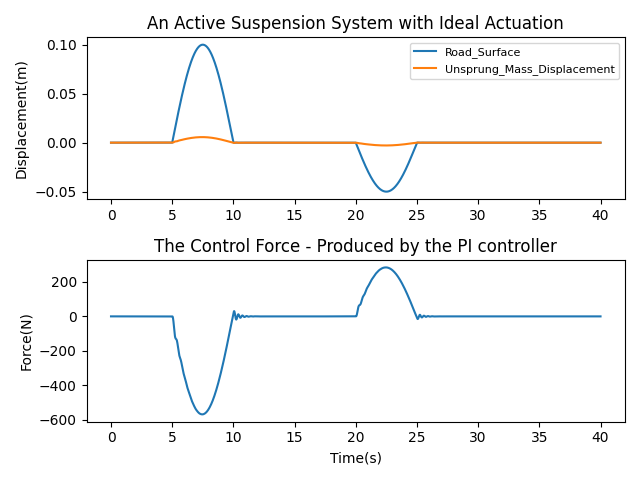

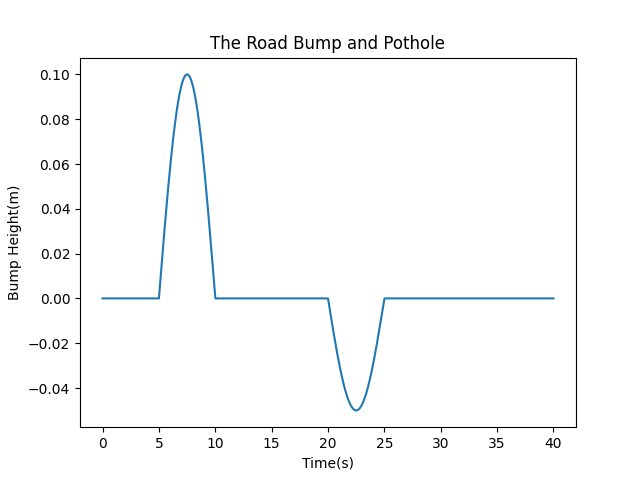

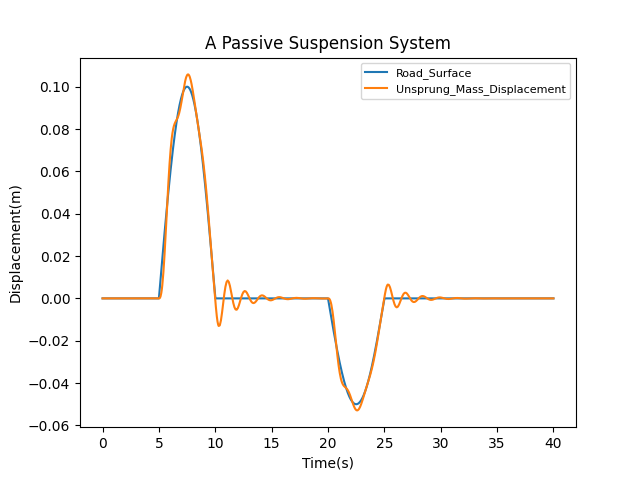

In [3]:
#Plot the results

#Plot the road bump and potholes
plt.figure(1)
plt.title('The Road Bump and Pothole')
plt.plot(data_pas['Zr_Road_Input.out_0'])
plt.ylabel('Bump Height(m)')
plt.xlabel('Time(s)')

#Plot the Road Bump and the Car's displacement for the passive suspension system
plt.figure(2)
plt.title("A Passive Suspension System")
plt.plot(data_pas['Zr_Road_Input.out_0'])
plt.plot(data_pas['integrator_Zs.out_0'] )
plt.ylabel('Displacement(m)')
plt.xlabel('Time(s)')
plt.legend(['Road_Surface','Unsprung_Mass_Displacement'],loc = 'upper right',fontsize=8)

#Plot the Road Bump and the Car's displacement and the control force for the active suspension system
# plt.figure(3)
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1)
# Plot the data on the subplots and set the titles
axs[0].plot(data_act['Zr_Road_Input.out_0'])
axs[0].plot(data_act['integrator_Zs.out_0'])
axs[0].set_title("An Active Suspension System with Ideal Actuation")
axs[0].set_ylabel('Displacement(m)')
axs[0].legend(['Road_Surface','Unsprung_Mass_Displacement'],loc = 'upper right',fontsize=8)

axs[1].plot(data_act['Control_Force.out_0'])
axs[1].set_title("The Control Force - Produced by the PI controller")
axs[1].set_ylabel('Force(N)')
axs[1].set_xlabel('Time(s)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plots
plt.show()


